In [44]:
# Installing required packages
!pip install pandas ipython-sql sqlalchemy --quiet

In [46]:
# Importing Python libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import prettytable
from prettytable import TableStyle

In [48]:
# Fixing prettytable style error
prettytable.DEFAULT = TableStyle.PLAIN_COLUMNS

In [56]:
# Loading SQL magic
%load_ext sql

# Connecting SQL magic to SQLite database
%sql sqlite:///schools.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [60]:
# Loading CSV into pandas
df = pd.read_csv("schools.csv")

# Convert SAT score columns to numeric
df[["average_math", "average_reading", "average_writing"]] = df[["average_math", "average_reading", "average_writing"]].apply(pd.to_numeric, errors="coerce")

# Drop rows with missing SAT scores
df.dropna(subset=["average_math", "average_reading", "average_writing"], inplace=True)

# Create total SAT score column
df["total_SAT"] = df["average_math"] + df["average_reading"] + df["average_writing"]

# Save cleaned DataFrame to SQLite
conn = sqlite3.connect('schools.db')
df.to_sql('schools', conn, if_exists='replace', index=False)
conn.close()

# Check columns
df.columns

Index(['school_name', 'borough', 'building_code', 'average_math',
       'average_reading', 'average_writing', 'percent_tested', 'total_SAT'],
      dtype='object')

In [64]:
%%sql
-- #1 Best Math Results (>=640)

SELECT school_name, average_math
FROM schools
WHERE average_math >= 640
ORDER BY average_math DESC;


 * sqlite:///schools.db
Done.


school_name,average_math
Stuyvesant High School,754
Bronx High School of Science,714
Staten Island Technical High School,711
Queens High School for the Sciences at York College,701
"High School for Mathematics, Science, and Engineering at City College",683
Brooklyn Technical High School,682
Townsend Harris High School,680
High School of American Studies at Lehman College,669
"New Explorations into Science, Technology and Math High School",657
Eleanor Roosevelt High School,641


In [96]:
%%sql
-- #2 Weighted Math Scores

SELECT
  school_name,
  average_math,
  PERCENT_RANK() OVER (ORDER BY average_math DESC) AS math_percentile
FROM schools
ORDER BY average_math DESC
LIMIT 10;

 * sqlite:///schools.db
Done.


school_name,average_math,math_percentile
Stuyvesant High School,754,0.0
Bronx High School of Science,714,0.00267379679144385
Staten Island Technical High School,711,0.0053475935828877
Queens High School for the Sciences at York College,701,0.008021390374331552
"High School for Mathematics, Science, and Engineering at City College",683,0.0106951871657754
Brooklyn Technical High School,682,0.013368983957219251
Townsend Harris High School,680,0.016042780748663103
High School of American Studies at Lehman College,669,0.01871657754010695
"New Explorations into Science, Technology and Math High School",657,0.0213903743315508
Eleanor Roosevelt High School,641,0.02406417112299465


In [94]:
%%sql
-- Math Score Percentile

SELECT
  school_name,
  average_math,
  PERCENT_RANK() OVER (ORDER BY average_math DESC) AS math_percentile
FROM schools
ORDER BY average_math DESC
LIMIT 10;

 * sqlite:///schools.db
Done.


school_name,average_math,math_percentile
Stuyvesant High School,754,0.0
Bronx High School of Science,714,0.00267379679144385
Staten Island Technical High School,711,0.0053475935828877
Queens High School for the Sciences at York College,701,0.008021390374331552
"High School for Mathematics, Science, and Engineering at City College",683,0.0106951871657754
Brooklyn Technical High School,682,0.013368983957219251
Townsend Harris High School,680,0.016042780748663103
High School of American Studies at Lehman College,669,0.01871657754010695
"New Explorations into Science, Technology and Math High School",657,0.0213903743315508
Eleanor Roosevelt High School,641,0.02406417112299465


In [100]:
%%sql
-- Difference from Borough Average

WITH borough_avg AS (
  SELECT borough, AVG(average_math) AS borough_math_avg
  FROM schools
  GROUP BY borough
)
SELECT
  s.school_name,
  s.borough,
  s.average_math,
  b.borough_math_avg,
  s.average_math - b.borough_math_avg AS math_diff_from_borough_avg
FROM schools s
JOIN borough_avg b ON s.borough = b.borough
ORDER BY math_diff_from_borough_avg DESC
LIMIT 10;


 * sqlite:///schools.db
Done.


school_name,borough,average_math,borough_math_avg,math_diff_from_borough_avg
Bronx High School of Science,Bronx,714,404.35714285714283,309.64285714285717
Stuyvesant High School,Manhattan,754,455.8876404494382,298.1123595505618
Brooklyn Technical High School,Brooklyn,682,416.4036697247706,265.5963302752294
High School of American Studies at Lehman College,Bronx,669,404.35714285714283,264.64285714285717
Queens High School for the Sciences at York College,Queens,701,462.3623188405797,238.6376811594203
"High School for Mathematics, Science, and Engineering at City College",Manhattan,683,455.8876404494382,227.1123595505618
Staten Island Technical High School,Staten Island,711,486.2,224.8
Townsend Harris High School,Queens,680,462.3623188405797,217.6376811594203
Brooklyn Latin School,Brooklyn,625,416.4036697247706,208.59633027522938
"New Explorations into Science, Technology and Math High School",Manhattan,657,455.8876404494382,201.1123595505618


In [72]:
#Top 10 Total SAT Scores
top_10_schools = %sql \
SELECT school_name, \
       (average_math + average_reading + average_writing) AS total_SAT \
FROM schools \
ORDER BY total_SAT DESC \largest_std_dev = %sql \
WITH totals AS ( \
  SELECT borough, (average_math + average_reading + average_writing) AS total_SAT \
  FROM schools), \
stats AS ( \
  SELECT borough, COUNT(*) AS num_schools, \
         ROUND(AVG(total_SAT), 2) AS average_SAT, \
         ROUND(STDDEV(total_SAT), 2) AS std_SAT \
  FROM totals GROUP BY borough) \
SELECT * FROM stats ORDER BY std_SAT DESC LIMIT 1;

largest_std_dev = largest_std_dev.DataFrame()
largest_std_dev

LIMIT 10;

top_10_schools = top_10_schools.DataFrame()

 * sqlite:///schools.db
Done.


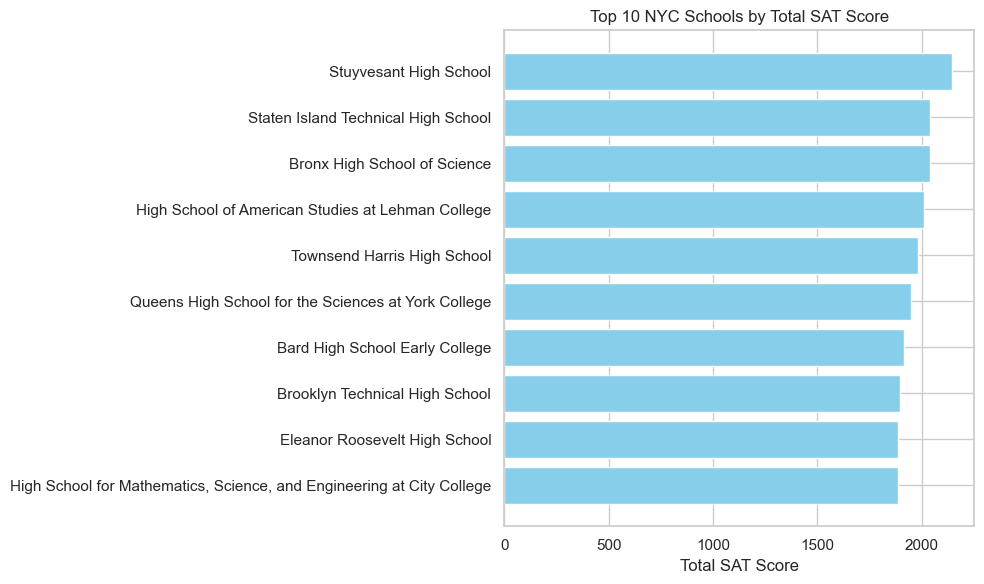

In [74]:
#Top 10 Schools by Total SAT

plt.figure(figsize=(10, 6))
plt.barh(top_10_schools["school_name"], top_10_schools["total_SAT"], color='skyblue')
plt.xlabel("Total SAT Score")
plt.title("Top 10 NYC Schools by Total SAT Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [80]:
%%sql result <<
SELECT 
    borough,
    (average_math + average_reading + average_writing) AS total_SAT
FROM schools;

 * sqlite:///schools.db
Done.
Returning data to local variable result


In [82]:
# Converting to DataFrame
df_stats = result.DataFrame()

# Grouping by borough and calculate stats
largest_std_dev = (
    df_stats.groupby("borough")
    .agg(
        num_schools=("total_SAT", "count"),
        average_SAT=("total_SAT", "mean"),
        std_SAT=("total_SAT", "std")
    )
    .round(2)
    .reset_index()
)

# Getting borough with largest std dev
largest_std_dev = largest_std_dev.sort_values("std_SAT", ascending=False).head(1)
largest_std_dev


,borough,num_schools,average_SAT,std_SAT
2,Manhattan,89,1340.13,230.29


In [90]:
# Group by borough and calculate statistics
stddevs_df = (
    df_stats.groupby("borough")
    .agg(
        num_schools=("total_SAT", "count"),
        average_SAT=("total_SAT", "mean"),
        std_SAT=("total_SAT", "std")
    )
    .round(2)
    .reset_index()
)

# Then extract the top one if needed
largest_std_dev = stddevs_df.sort_values("std_SAT", ascending=False).head(1)

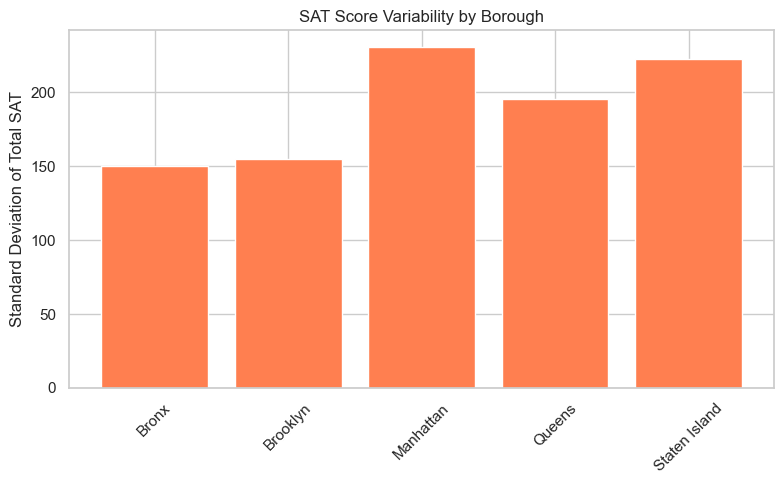

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(stddevs_df["borough"], stddevs_df["std_SAT"], color="coral")
plt.ylabel("Standard Deviation of Total SAT")
plt.title("SAT Score Variability by Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()